# NCN müügitulu korrelatsioon põhiliste majandusnäitajatega ja lineaarregressiooni mudel

Käesoleva testi eesmärgiks on:
1. Uurida NCNi korrelatsiooni põhiliste makromajanduslike näitajatega
2. Luua mitme muutujaga lineaarregressiooni mudel, mis, kasutades muutujatena valitud makromajanduslikke näitajaid, annaks väljundina NCN müügitulu võimaliku väärtuse
3. Vastavat mudelit treenida ja testida.

Eesti Pank ja Rahandusministeerium ennustavad oma pikkades prognoosides muuhullgas ära järgmised näitajad: SKP püsivhindades kokku ja komponentide kaupa, töötuse määra, keskmise brutokuupalga, jooksevkonto saldo ja valitsemissektori eelarvetasakaalu. Alljärgnevalt analüüsitakse NCN müügitulu arengut nii nende kui ka teiste enamlevinud makronäitajate suhtes. Juhul kui NCN müügitulu korrelatsioon on tugevam näitajatega, mida EP ja RM pikalt ei ennusta, on eesmärgiks luua eraldi regressioonimudel, mis vastavat näitajat ennustab ikkagi EP ja RM pika ennustuse näitajate kaudu.

In [193]:
# Impordi vajalikud teegid
import pandas as pd
import numpy as np
                                                                                                                                      
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [194]:
# loe sisse andmed
df=pd.read_excel(r"C:\Users\andri\Desktop\NCN_mudel_2021-2024\NCN_mudel_makro_qrt_jup_final.xlsx")

In [195]:
# Näita andmetabeli esimesed viis rida
df.head()

,Kuupäev,Kvartal,Ehitus_SKP,Omal_jõul_Eesti_ehitustööd,NCN_müügitulu,NCN_hooned,NCN_rajatised,SKP_jooksevhindades,SKP_püsivhindades,Kapitali_kogumahutus_SKPp,...,Kaupade_eksport,Ettevõtete_kogukasum,Ettevõtete_investeeringud_ehitistesse,Mittefinantsettevõtete_laenukäive,Riigieelarve_toetused,Riigieelarve_kokku,Val_sek_kap_kogum,Mitteeluh_ehitusload,Eluh_ehitusload,Rajat_ehitusload
0,2005-03-31,I kvartal 2005,158.8,238.3,20281.978193,11615.614081,8666.364112,2531.5,4035.9,941.5,...,1361.954366,402.8132,156.2868,439.3,88.7531,748.1441,59.4,827.7,303.5,3328.244559
1,2005-06-30,II kvartal 2005,201.6,348.6,23662.329196,13551.385919,10110.635888,2847.6,4530.4,1174.8,...,1495.739755,580.1038,197.9173,587.9,84.2647,899.6778,108.1,1147.5,661.4,8845.273600
2,2005-09-30,III kvartal 2005,267.0,462.3,36786.905781,16922.000000,19865.000000,2909.1,4550.8,1348.4,...,1584.771726,611.5209,255.2958,746.1,29.2829,932.9883,135.5,703.1,671.4,4195.437100
3,2005-12-31,IV kvartal 2005,227.1,432.3,26285.902369,16294.674408,9991.441131,3048.2,4814.3,1353.8,...,1759.408298,598.3256,306.2424,957.5,95.6165,943.8239,222.7,885.1,602.5,2222.022300
4,2006-03-31,I kvartal 2006,212.9,319.6,21844.618000,15974.000000,5871.000000,3021.7,4466.4,1215.8,...,1835.037463,568.7657,229.2167,808.4,73.9282,841.1071,84.9,766.7,505.2,1958.982400


In [196]:
# Andmetabeli suurus
df.shape

(64, 28)

Text(0, 0.5, 'tEur kvartalis')

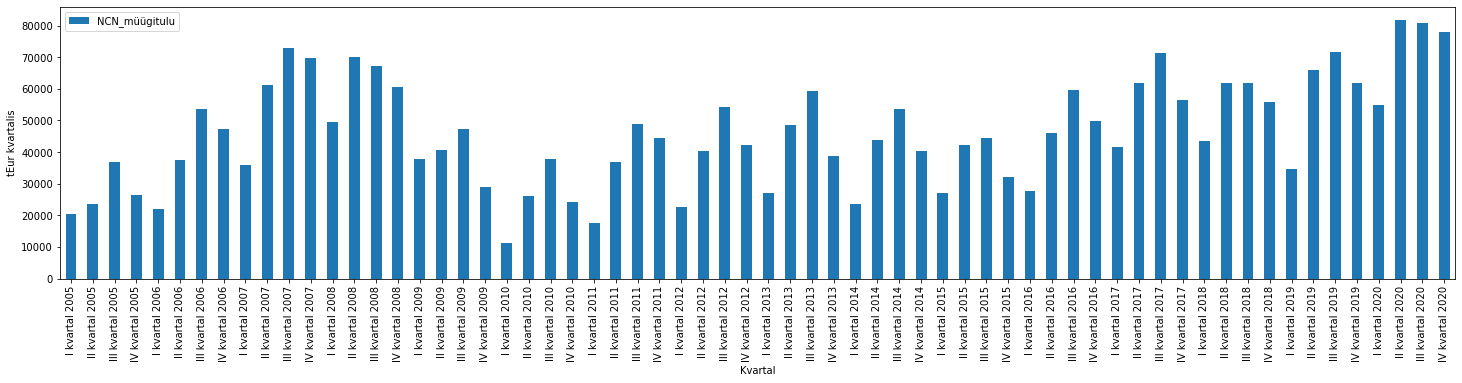

In [197]:
# Illustreerimiseks NCN kvartaalse müügitulu sessoonsuse graafik
ax = df.plot.bar(x='Kvartal', y='NCN_müügitulu', rot=90, figsize=(25,5))
plt.ylabel('tEur kvartalis')

In [198]:
# Näita andmetüüpe
df.dtypes

Kuupäev                                  datetime64[ns]
Kvartal                                          object
Ehitus_SKP                                      float64
Omal_jõul_Eesti_ehitustööd                      float64
NCN_müügitulu                                   float64
NCN_hooned                                      float64
NCN_rajatised                                   float64
SKP_jooksevhindades                             float64
SKP_püsivhindades                               float64
Kapitali_kogumahutus_SKPp                       float64
Eratarbimine_SKPp                               float64
Eksport_SKPp                                    float64
Valitsemissektor_SKPp                           float64
Töötute_arv                                     float64
Töötuse_määr                                    float64
Keskmine_brutokuupalk                           float64
Jooksevkonto_SKP_%                              float64
Val_sek_tasakaal_%                              

In [199]:
# andmete statistiline kokkuvõte
df.describe()

,Ehitus_SKP,Omal_jõul_Eesti_ehitustööd,NCN_müügitulu,NCN_hooned,NCN_rajatised,SKP_jooksevhindades,SKP_püsivhindades,Kapitali_kogumahutus_SKPp,Eratarbimine_SKPp,Eksport_SKPp,...,Kaupade_eksport,Ettevõtete_kogukasum,Ettevõtete_investeeringud_ehitistesse,Mittefinantsettevõtete_laenukäive,Riigieelarve_toetused,Riigieelarve_kokku,Val_sek_kap_kogum,Mitteeluh_ehitusload,Eluh_ehitusload,Rajat_ehitusload
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,300.964062,509.745313,46304.930610,28373.983866,17740.827279,4826.418750,5152.140625,1359.937500,2510.251562,3640.626563,...,2717.881546,674.144580,235.659000,663.128125,182.867966,1726.356010,258.453125,762.786282,796.695358,2670.850590
std,80.479636,163.189857,17048.320676,13411.290250,9428.966146,1254.424655,608.374943,343.047319,295.770091,819.604965,...,704.399710,173.444760,73.200735,230.646615,115.617504,575.678689,104.244525,244.479031,352.572700,1617.210632
min,124.500000,170.100000,11248.194496,8326.000000,2903.000000,2531.500000,4035.900000,701.700000,1948.200000,1986.500000,...,1361.954366,149.443200,88.869700,329.500000,8.798200,748.144100,59.400000,223.735000,158.920410,656.591000
25%,231.500000,369.625000,35461.185445,17903.250000,10230.158972,3825.350000,4693.275000,1169.825000,2283.575000,2905.350000,...,2030.889013,594.308225,181.041725,498.975000,97.429250,1372.537175,179.950000,609.553750,504.875000,1433.409000
50%,303.450000,507.600000,44441.907000,23696.646511,17366.500000,4645.250000,5058.800000,1366.450000,2503.500000,3834.100000,...,2993.715687,714.256700,227.188450,583.900000,152.288462,1587.782850,250.000000,807.423500,840.598000,2531.599600
75%,360.750000,604.825000,59924.991020,38012.750000,23870.250000,5587.325000,5499.400000,1542.325000,2715.125000,4252.225000,...,3173.543908,810.606425,299.066625,767.125000,229.782325,1925.159575,334.500000,914.306975,1072.103500,3328.244559
max,456.300000,867.600000,81873.431000,63653.000000,46710.000000,7455.800000,6632.200000,3018.300000,3099.200000,4966.400000,...,4083.969205,923.825900,397.702100,1229.100000,501.737300,3162.693500,468.400000,1248.300000,1573.805000,8845.273600


In [200]:
# Kõikide andmete omavaheline korrelatsioon
df.corr()

,Ehitus_SKP,Omal_jõul_Eesti_ehitustööd,NCN_müügitulu,NCN_hooned,NCN_rajatised,SKP_jooksevhindades,SKP_püsivhindades,Kapitali_kogumahutus_SKPp,Eratarbimine_SKPp,Eksport_SKPp,...,Kaupade_eksport,Ettevõtete_kogukasum,Ettevõtete_investeeringud_ehitistesse,Mittefinantsettevõtete_laenukäive,Riigieelarve_toetused,Riigieelarve_kokku,Val_sek_kap_kogum,Mitteeluh_ehitusload,Eluh_ehitusload,Rajat_ehitusload
Ehitus_SKP,1.000000,0.959451,0.919985,0.768306,0.570210,0.650005,0.824675,0.737832,0.740028,0.565346,...,0.481077,0.630354,0.562462,0.441173,-0.170330,0.587857,0.771989,0.319451,0.439035,-0.155873
Omal_jõul_Eesti_ehitustööd,0.959451,1.000000,0.888823,0.796574,0.477576,0.723761,0.882181,0.760573,0.799077,0.621370,...,0.543990,0.601041,0.576149,0.413829,-0.110580,0.684773,0.809531,0.280700,0.482590,-0.166828
NCN_müügitulu,0.919985,0.888823,1.000000,0.833962,0.622590,0.606492,0.737454,0.671640,0.659981,0.486974,...,0.407842,0.457030,0.465584,0.323859,-0.132727,0.577101,0.752001,0.363885,0.360532,-0.085298
NCN_hooned,0.768306,0.796574,0.833962,1.000000,0.087946,0.794070,0.843409,0.669403,0.851017,0.623420,...,0.550755,0.281538,0.330185,0.243560,-0.091385,0.776075,0.661275,0.402425,0.536955,-0.278729
NCN_rajatised,0.570210,0.477576,0.622590,0.087946,1.000000,-0.035131,0.135944,0.266982,-0.013248,-0.014798,...,-0.054052,0.419021,0.383896,0.251415,-0.105171,-0.058046,0.418620,0.093822,-0.119122,0.245196
SKP_jooksevhindades,0.650005,0.723761,0.606492,0.794070,-0.035131,1.000000,0.906505,0.572207,0.878027,0.935423,...,0.894808,0.361763,0.167562,-0.038847,0.134482,0.960440,0.720025,-0.009929,0.732629,-0.350227
SKP_püsivhindades,0.824675,0.882181,0.737454,0.843409,0.135944,0.906505,1.000000,0.780546,0.942444,0.817551,...,0.750295,0.529359,0.447911,0.304619,0.008353,0.862409,0.782747,0.211522,0.668464,-0.278593
Kapitali_kogumahutus_SKPp,0.737832,0.760573,0.671640,0.669403,0.266982,0.572207,0.780546,1.000000,0.720266,0.500313,...,0.471229,0.472216,0.698963,0.483754,-0.017078,0.541300,0.669020,0.245391,0.503759,-0.110943
Eratarbimine_SKPp,0.740028,0.799077,0.659981,0.851017,-0.013248,0.878027,0.942444,0.720266,1.000000,0.746142,...,0.673856,0.394384,0.422050,0.361974,-0.028457,0.819161,0.673901,0.264795,0.608663,-0.396500
Eksport_SKPp,0.565346,0.621370,0.486974,0.623420,-0.014798,0.935423,0.817551,0.500313,0.746142,1.000000,...,0.972198,0.495987,0.069895,-0.148514,0.182512,0.864872,0.661919,-0.215441,0.808100,-0.322344


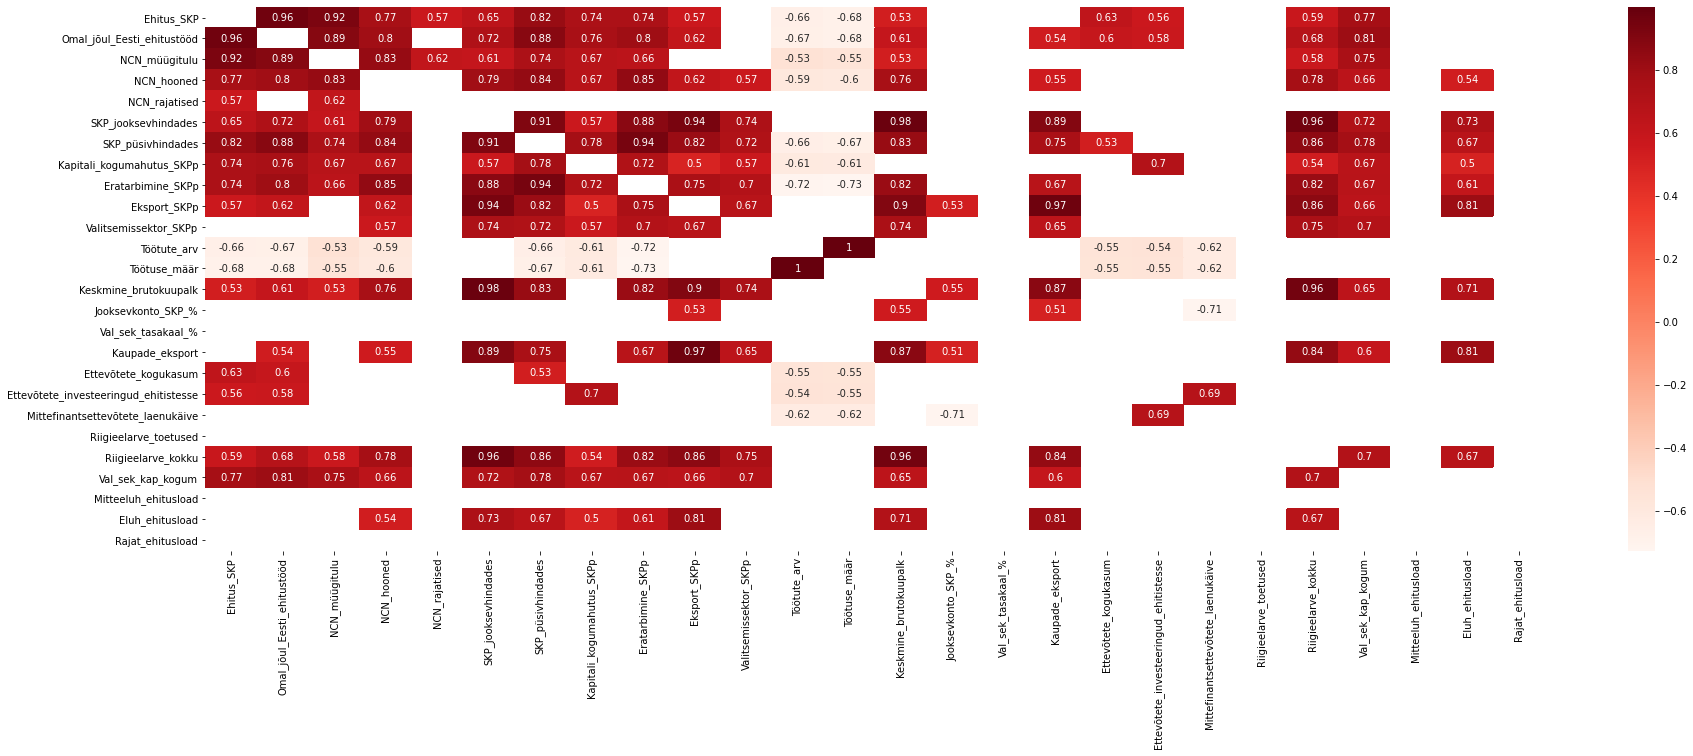

In [201]:
# Sama graafiliselt (stackoverflow'st), tuvastavaks tugevamaid korrelatsioonipaare
dfCorr = df.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

Nagu näha, on NCN müügitulul tugev korrelatsioon ehitussektori SKP'ga, püsivhindades SKP komponentidega 'Kapitali kogumahutus' ja 'Eratarbimine' ning valitsussektori kapitali kogumahutusega, samuti keskmiselt tugev korrelatsioon töötuse määra ja keskmise brutokuupalgaga. Esitan seda ka graafiliselt.

(0.0, 136756.29393378756)

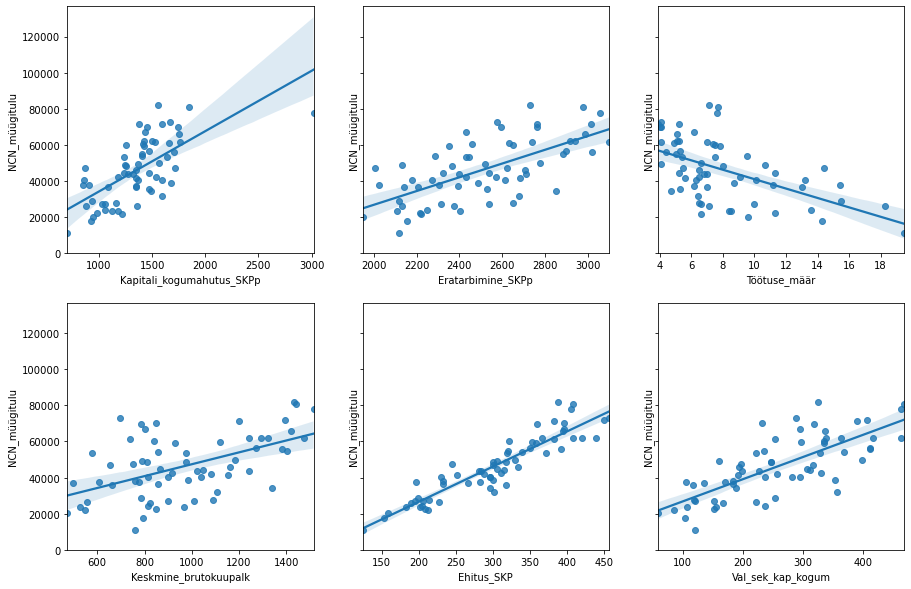

In [202]:
# NCN müügitulu enimkorreleeruvate majandusnäitajate suhtes
fig, axes =plt.subplots(2,3,figsize=(15,10),sharey=True)
sns.regplot(x="Kapitali_kogumahutus_SKPp", y="NCN_müügitulu", data=df,ax=axes[0,0])
sns.regplot(x="Eratarbimine_SKPp", y="NCN_müügitulu", data=df,ax=axes[0,1])
sns.regplot(x="Töötuse_määr", y="NCN_müügitulu", data=df,ax=axes[0,2])
sns.regplot(x="Keskmine_brutokuupalk", y="NCN_müügitulu", data=df,ax=axes[1,0])
sns.regplot(x="Ehitus_SKP", y="NCN_müügitulu", data=df,ax=axes[1,1])
sns.regplot(x="Val_sek_kap_kogum", y="NCN_müügitulu", data=df,ax=axes[1,2])
plt.ylim(0,)

In [203]:
from scipy import stats

In [204]:
# Toon välja ülaltoodud graafikute andmete korrelatsioonid (The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.)
pearson_coef, p_value = stats.pearsonr(df['Kapitali_kogumahutus_SKPp'], df['NCN_müügitulu'])
print("Pearsoni korrelatsioon kapitali kogumahutuse SKP ja NCN müügitulu vahel on", pearson_coef, " ja P-väärtus P =", p_value)  

pearson_coef, p_value = stats.pearsonr(df['Eratarbimine_SKPp'], df['NCN_müügitulu'])
print("Pearsoni korrelatsioon eratarbimise SKP ja NCN müügitulu vahel on", pearson_coef, " ja P-väärtus P =", p_value)  

pearson_coef, p_value = stats.pearsonr(df['Töötuse_määr'], df['NCN_müügitulu'])
print("Pearsoni korrelatsioon töötuse määra ja NCN müügitulu vahel on", pearson_coef, " ja P-väärtus P =", p_value) 

pearson_coef, p_value = stats.pearsonr(df['Keskmine_brutokuupalk'], df['NCN_müügitulu'])
print("Pearsoni korrelatsioon keskmise brutokuupalga ja NCN müügitulu vahel on", pearson_coef, " ja P-väärtus P =", p_value)

pearson_coef, p_value = stats.pearsonr(df['Ehitus_SKP'], df['NCN_müügitulu'])
print("Pearsoni korrelatsioon ehitussektori SKP ja NCN müügitulu vahel on", pearson_coef, " ja P-väärtus P =", p_value)

pearson_coef, p_value = stats.pearsonr(df['Val_sek_kap_kogum'], df['NCN_müügitulu'])
print("Pearsoni korrelatsioon valitsussektori kapitali kogumahutuse ja NCN müügitulu vahel on", pearson_coef, " ja P-väärtus P =", p_value)

Pearsoni korrelatsioon kapitali kogumahutuse SKP ja NCN müügitulu vahel on 0.6716400490924453  ja P-väärtus P = 1.2394514135426617e-09
Pearsoni korrelatsioon eratarbimise SKP ja NCN müügitulu vahel on 0.6599805467684285  ja P-väärtus P = 2.9913813787663052e-09
Pearsoni korrelatsioon töötuse määra ja NCN müügitulu vahel on -0.5473717643197871  ja P-väärtus P = 2.860735638749557e-06
Pearsoni korrelatsioon keskmise brutokuupalga ja NCN müügitulu vahel on 0.5285290130443094  ja P-väärtus P = 7.1524250479875416e-06
Pearsoni korrelatsioon ehitussektori SKP ja NCN müügitulu vahel on 0.9199847720477291  ja P-väärtus P = 6.600432766203026e-27
Pearsoni korrelatsioon valitsussektori kapitali kogumahutuse ja NCN müügitulu vahel on 0.7520011890656388  ja P-väärtus P = 7.947082056771157e-13


In [205]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lm = LinearRegression()
lm

LinearRegression()

<AxesSubplot:xlabel='Val_sek_kap_kogum', ylabel='NCN_müügitulu'>

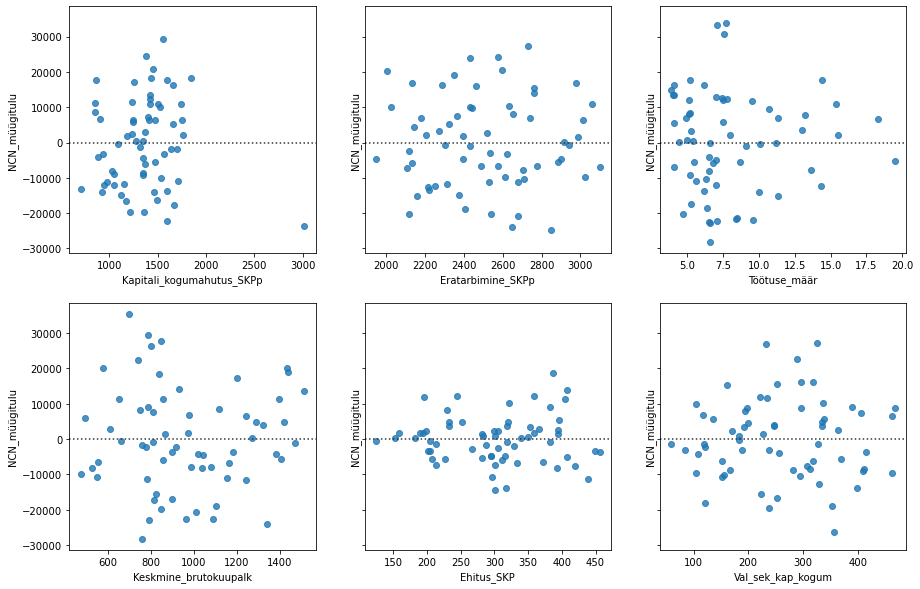

In [206]:
# Residual plot - kas lineaarregressioon on kohane, kas punktid jaotuvad ühtlaselt ümber x telje?
fig, axes =plt.subplots(2,3,figsize=(15,10),sharey=True)
sns.residplot(x="Kapitali_kogumahutus_SKPp", y="NCN_müügitulu", data=df,ax=axes[0,0])
sns.residplot(x="Eratarbimine_SKPp", y="NCN_müügitulu", data=df,ax=axes[0,1])
sns.residplot(x="Töötuse_määr", y="NCN_müügitulu", data=df,ax=axes[0,2])
sns.residplot(x="Keskmine_brutokuupalk", y="NCN_müügitulu", data=df,ax=axes[1,0])
sns.residplot(x="Ehitus_SKP", y="NCN_müügitulu", data=df,ax=axes[1,1])
sns.residplot(x="Val_sek_kap_kogum", y="NCN_müügitulu", data=df,ax=axes[1,2])

Mitme muutujaga lineaarregressioon on kohane. Siit edasi:\
a) eesmärk on koostada mitme muutujaga lineaarregressiooni valem, mille abil ennustada makronäitajate mõju NCNi müügitulule\
b) ennustuse aluseks saavad olla näitajad, mille kohta EP ja RM väljastavad pikaajalisi ennustusi\
c) seega kui NCN müügitulu korreleerub tugevalt näitajaga, mille osas EP või RM ennustus puudub (a la valitsussektori kapitali kogumahutus), tuleb läbi korrelatsioonianalüüsi jõuda vastava näitaja eraldi ennustamiseni läbi EP ja RMi avaldatud pikaajaliste makronäitajate.

## NCN müügitulu lineaarregressiooni valem

In [207]:
Z = df[['Kapitali_kogumahutus_SKPp', 'Eratarbimine_SKPp', 'Töötuse_määr', 'Keskmine_brutokuupalk','Ehitus_SKP','Val_sek_kap_kogum']]
#NB! Ehitussektori SKPd ja valitsussektori kapitali kogumahutust EP ja RM ei ennusta, seega tuleb koostada eraldi valem

In [208]:
lm.fit(Z, df['NCN_müügitulu'])

LinearRegression()

In [209]:
lm.intercept_

-8542.471880773155

In [210]:
lm.coef_

array([  1.76079014,  -8.83328911, 402.84588682,   8.58630705,
       207.35940944,   2.70915909])

In [211]:
print('The R-square is: ', lm.score(Z, df['NCN_müügitulu']))

The R-square is:  0.8623146446033636


In [212]:
Y_predict_multifit = lm.predict(Z)

In [213]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['NCN_müügitulu'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  39392317.98368451


In [214]:
Y_hat = lm.predict(Z)

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


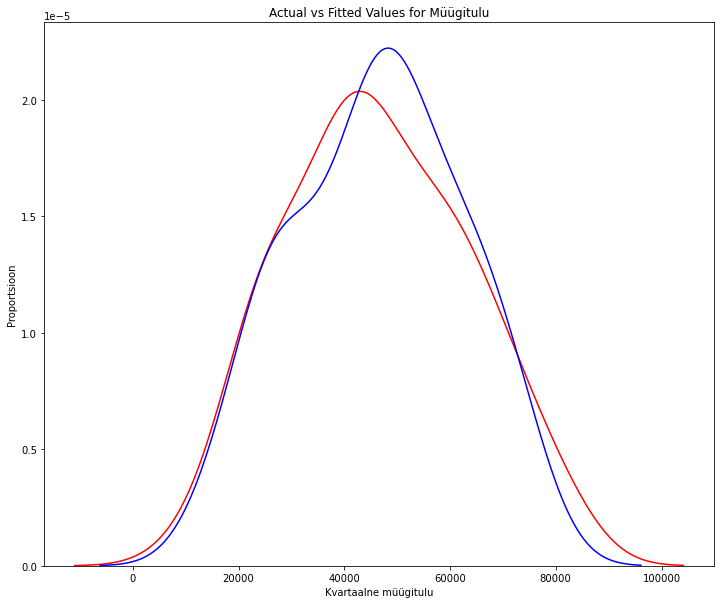

In [215]:
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['NCN_müügitulu'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Müügitulu')
plt.xlabel('Kvartaalne müügitulu')
plt.ylabel('Proportsioon')

plt.show()
plt.close()

## Ehitussektori SKP lineaarregressiooni valem

Kuna ehitussektori SKPd EP ja RM eraldi ei ennusta, tuleb luua sellele eraldi valem, jõudmaks EP ja RM ennustatavate näitajateni. Siit nähtub, et tugevalt korreleeruv 'Ettevõtete kogukasum' vajab samuti eraldi valemit. Kogu tants jätkub sama loogikaga.

In [216]:
A = df[['Kapitali_kogumahutus_SKPp', 'Töötuse_määr', 'Val_sek_kap_kogum','Ettevõtete_kogukasum']]
# Ettevõtete kogukasum vajab eraldi valemit!

In [217]:
lm.fit(A, df['Ehitus_SKP'])

LinearRegression()

In [218]:
lm.intercept_

176.3181301439757

In [219]:
lm.coef_

array([ 0.02926149, -7.68756183,  0.38206179,  0.07056577])

In [220]:
print('The R-square is: ', lm.score(A, df['Ehitus_SKP']))

The R-square is:  0.8031014250241102


In [221]:
Y_predict_multifit = lm.predict(A)

In [222]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['Ehitus_SKP'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  1255.3798653749577


In [223]:
Y_hat = lm.predict(A)

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


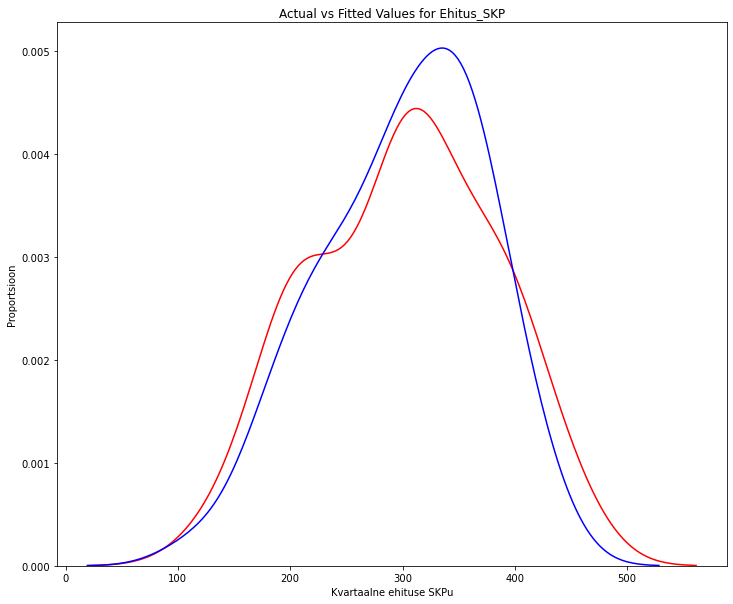

In [224]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['Ehitus_SKP'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Ehitus_SKP')
plt.xlabel('Kvartaalne ehituse SKPu')
plt.ylabel('Proportsioon')

plt.show()
plt.close()

## Valitsussektori kapitali kogumahutuse lineaarregressiooni valem

In [225]:
B = df[['Eksport_SKPp','Valitsemissektor_SKPp', 'Riigieelarve_kokku']]
# Riigieelarve vajab eraldi valemit!

In [226]:
lm.fit(B, df['Val_sek_kap_kogum'])

LinearRegression()

In [227]:
lm.intercept_

-199.1942173567066

In [228]:
lm.coef_

array([0.02178614, 0.29783315, 0.04839319])

In [229]:
print('The R-square is: ', lm.score(B, df['Val_sek_kap_kogum']))

The R-square is:  0.5723488704562811


In [230]:
Y_predict_multifit = lm.predict(B)

In [231]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['Val_sek_kap_kogum'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  4574.63771858505


In [232]:
Y_hat = lm.predict(B)

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


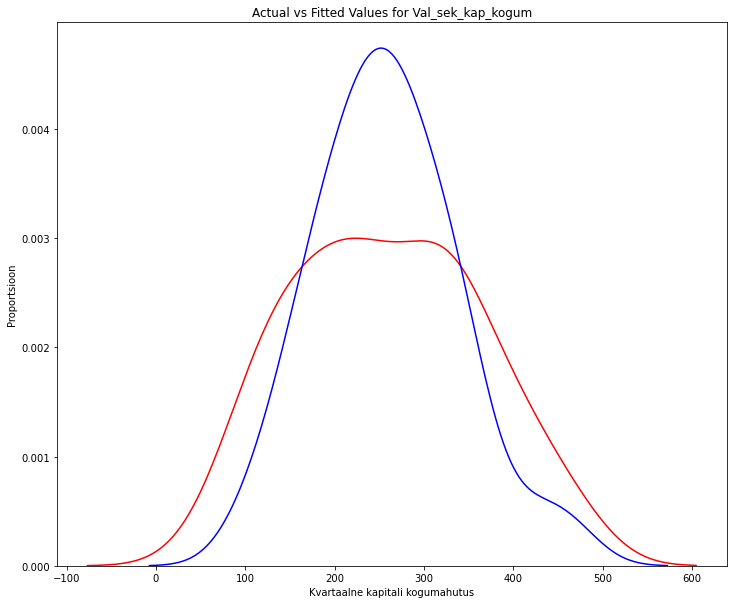

In [233]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['Val_sek_kap_kogum'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Val_sek_kap_kogum')
plt.xlabel('Kvartaalne kapitali kogumahutus')
plt.ylabel('Proportsioon')

plt.show()
plt.close()

## Riigieelarve lineaarregressiooni valem

In [234]:
C = df[['SKP_püsivhindades','Keskmine_brutokuupalk','Jooksevkonto_SKP_%']]

In [235]:
lm.fit(C, df['Riigieelarve_kokku'])

LinearRegression()

In [236]:
lm.intercept_

-1008.1532302367086

In [237]:
lm.coef_

array([0.25103127, 1.49948875, 3.55157687])

In [238]:
print('The R-square is: ', lm.score(C, df['Riigieelarve_kokku']))

The R-square is:  0.9310487706882428


In [239]:
Y_predict_multifit = lm.predict(C)

In [240]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['Riigieelarve_kokku'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  22493.803331041


In [241]:
Y_hat = lm.predict(C)

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


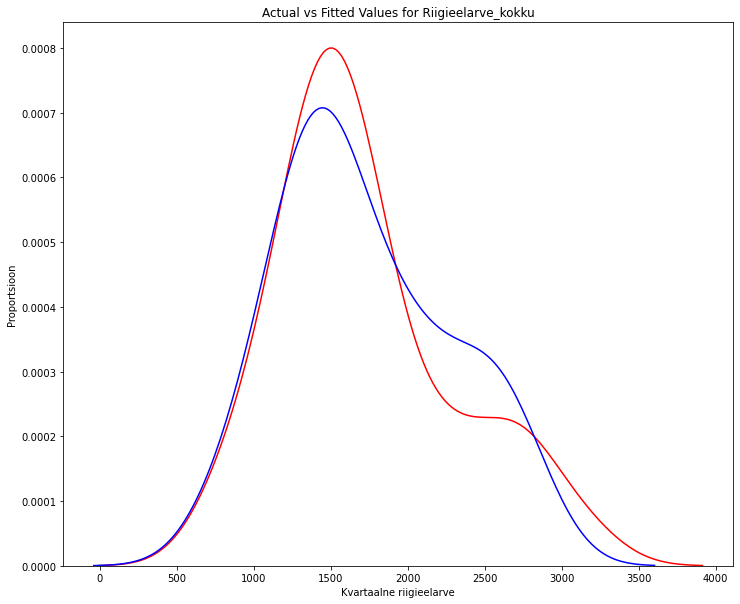

In [242]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['Riigieelarve_kokku'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Riigieelarve_kokku')
plt.xlabel('Kvartaalne riigieelarve')
plt.ylabel('Proportsioon')

plt.show()
plt.close()

## Ettevõtete kogukasumi lineaarregressiooni valem

In [243]:
D = df[['Eksport_SKPp','Töötuse_määr','Val_sek_tasakaal_%','Val_sek_kap_kogum']]

In [244]:
lm.fit(D, df['Ettevõtete_kogukasum'])

LinearRegression()

In [245]:
lm.intercept_

556.1646973364541

In [246]:
lm.coef_

array([  0.0469438 , -17.07453969,  23.38313803,   0.33500988])

In [247]:
print('The R-square is: ', lm.score(D, df['Ettevõtete_kogukasum']))

The R-square is:  0.6273624207590174


In [248]:
Y_predict_multifit = lm.predict(D)

In [249]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['Ettevõtete_kogukasum'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11034.930230093963


In [250]:
Y_hat = lm.predict(D)

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


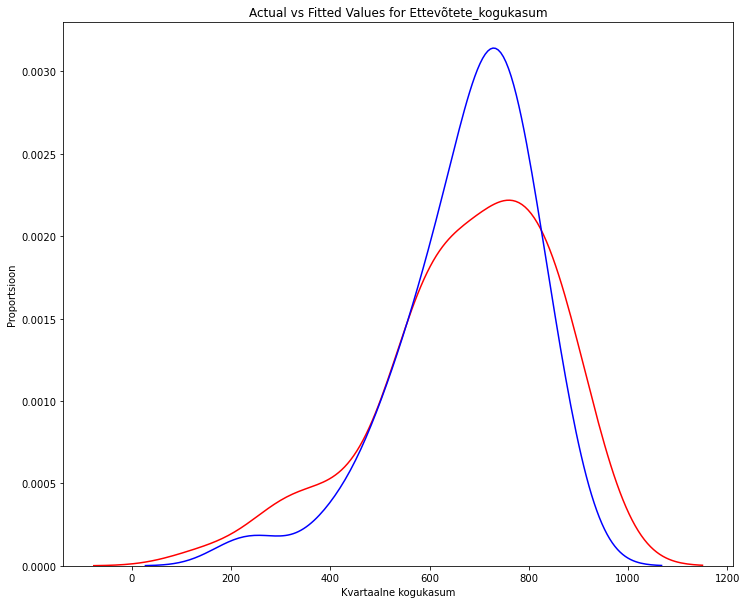

In [251]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['Ettevõtete_kogukasum'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Ettevõtete_kogukasum')
plt.xlabel('Kvartaalne kogukasum')
plt.ylabel('Proportsioon')

plt.show()
plt.close()

# Treenimine ja testimine

In [252]:
y_data=df['NCN_müügitulu']

In [253]:
x_data=df.drop('NCN_müügitulu', axis=1)

In [254]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 16
number of training samples: 48


In [255]:
lm.fit(x_train[['Kapitali_kogumahutus_SKPp', 'Eratarbimine_SKPp', 'Töötuse_määr', 'Keskmine_brutokuupalk','Ehitus_SKP','Val_sek_kap_kogum']], y_train)

LinearRegression()

In [256]:
yhat_train = lm.predict(x_train[['Kapitali_kogumahutus_SKPp', 'Eratarbimine_SKPp', 'Töötuse_määr', 'Keskmine_brutokuupalk','Ehitus_SKP','Val_sek_kap_kogum']])
yhat_train[0:5]

array([28540.79229998, 22280.71895437, 22180.14590749, 75464.02798823,
       43517.04010377])

In [257]:
yhat_test = lm.predict(x_test[['Kapitali_kogumahutus_SKPp', 'Eratarbimine_SKPp', 'Töötuse_määr', 'Keskmine_brutokuupalk','Ehitus_SKP','Val_sek_kap_kogum']])
yhat_test[0:5]

array([19256.66403898, 44837.19680943, 42031.97202149, 50697.73616829,
       25897.30354992])

In [258]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('NCN kvartaalne müügitulu')
    plt.ylabel('Proportsioon')

    plt.show()
    plt.close()

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


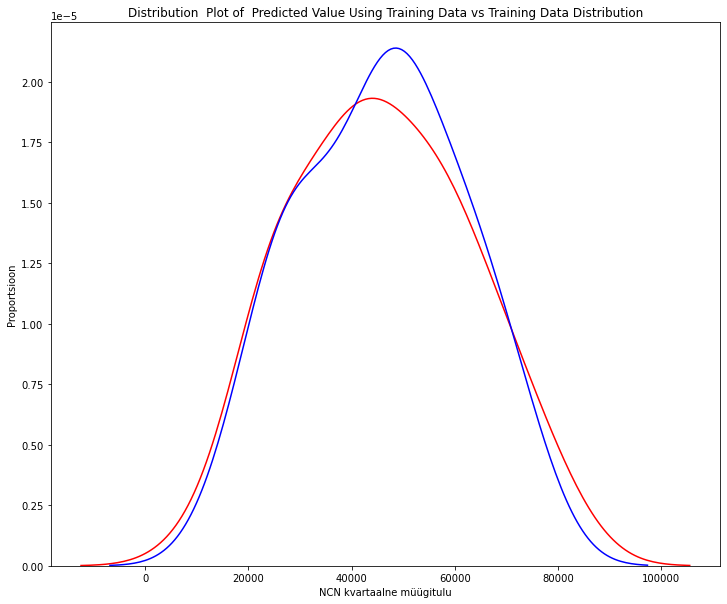

In [259]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


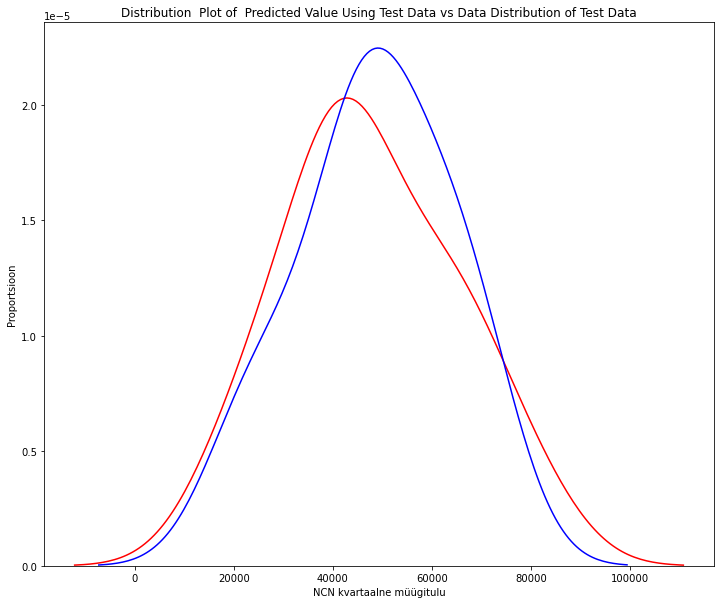

In [260]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [261]:
# R squared is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).
testscore=lm.score(x_test[['Kapitali_kogumahutus_SKPp', 'Eratarbimine_SKPp', 'Töötuse_määr', 'Keskmine_brutokuupalk','Ehitus_SKP','Val_sek_kap_kogum']], y_test)
print('Testivalimi R-square on: ', testscore)

Testivalimi R-square on:  0.8764844899886296


In [262]:
trainscore=lm.score(x_train[['Kapitali_kogumahutus_SKPp', 'Eratarbimine_SKPp', 'Töötuse_määr', 'Keskmine_brutokuupalk','Ehitus_SKP','Val_sek_kap_kogum']], y_train)
print('Treeningvalimi R-square on: ', trainscore)

Treeningvalimi R-square on:  0.8550834162048627


Lineaarregressiooni meetod paistab olema päris viisakas valik selle ülesande jaoks.

## Cross validation score

In [263]:
from sklearn.model_selection import cross_val_score

In [264]:
Rcross = cross_val_score(lm, x_data[['Kapitali_kogumahutus_SKPp', 'Eratarbimine_SKPp', 'Töötuse_määr', 'Keskmine_brutokuupalk','Ehitus_SKP','Val_sek_kap_kogum']], y_data, cv=4)

In [265]:
Rcross

array([-0.76707414,  0.6344608 ,  0.70852684, -0.73039864])

In [266]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are -0.038621283075737006 and the standard deviation is 0.7107160620308471


In [267]:
-1 * cross_val_score(lm,x_data[['Kapitali_kogumahutus_SKPp', 'Eratarbimine_SKPp', 'Töötuse_määr', 'Keskmine_brutokuupalk','Ehitus_SKP','Val_sek_kap_kogum']], y_data,cv=4,scoring='neg_mean_squared_error')

array([5.75489679e+08, 5.00888101e+07, 3.58579262e+07, 3.05655359e+08])

In [268]:
from sklearn.model_selection import cross_val_predict

In [269]:
yhat = cross_val_predict(lm,x_data[['Kapitali_kogumahutus_SKPp', 'Eratarbimine_SKPp', 'Töötuse_määr', 'Keskmine_brutokuupalk','Ehitus_SKP','Val_sek_kap_kogum']], y_data,cv=4)
yhat[0:5]

array([ 6935.44530817, 10790.13360703, 18196.71449126,  6331.78707843,
        7866.92373649])

## Test polünoomiga

In [270]:
from sklearn.preprocessing import PolynomialFeatures

In [271]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['Kapitali_kogumahutus_SKPp', 'Eratarbimine_SKPp', 'Töötuse_määr', 'Keskmine_brutokuupalk','Ehitus_SKP','Val_sek_kap_kogum']])
x_test_pr = pr.fit_transform(x_test[['Kapitali_kogumahutus_SKPp', 'Eratarbimine_SKPp', 'Töötuse_määr', 'Keskmine_brutokuupalk','Ehitus_SKP','Val_sek_kap_kogum']])
pr

PolynomialFeatures(degree=5)

In [272]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [273]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([14083.76747638, 12232.68304154, 46664.19859867, 38340.69639341,
       44900.97140571])

In [274]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [14083.76747638 12232.68304154 46664.19859867 38340.69639341]
True values: [17723.    40353.048 43661.627 44542.   ]


In [275]:
poly.score(x_train_pr, y_train)

1.0

In [276]:
poly.score(x_test_pr, y_test)

-0.08933447381246551

Text(0.5, 1.0, 'R^2 Using Test Data')

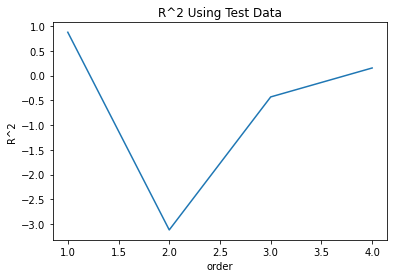

In [277]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['Kapitali_kogumahutus_SKPp', 'Eratarbimine_SKPp', 'Töötuse_määr', 'Keskmine_brutokuupalk','Ehitus_SKP','Val_sek_kap_kogum']])
    
    x_test_pr = pr.fit_transform(x_test[['Kapitali_kogumahutus_SKPp', 'Eratarbimine_SKPp', 'Töötuse_määr', 'Keskmine_brutokuupalk','Ehitus_SKP','Val_sek_kap_kogum']])    
    
    lm.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lm.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
